# **1**. **Introduction**

Air pollution is a significant global concern impacting public health and the environment. Accurately predicting air quality can help inform public safety measures and policy-making. This project aims to develop a predictive model for the Air Quality Index (AQI) using various air pollutant concentrations as input features. The model will be trained on a dataset of air quality measurements and evaluated using statistical metrics to assess its performance.

# 2. **Data** **Overview**
The dataset used for this project, city_day.csv, contains daily records of various air pollutants and AQI measurements for different cities. Key features include:

Air Pollutants: Concentrations of PM2.5, PM10, NO, NO2, NOx, CO, SO2, O3, Benzene, Toluene, Xylene, NH3.
Target Variable: AQI (Air Quality Index), which indicates the overall quality of the air.
Initial Data Properties
Number of records: ( 29531 rows in the dataset)
Number of features: ( 16 columns)
Missing Values: Checked and filled using the median of the respective columns.
Duplicates: Identified and confirmed as zero.


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/city_day (1).csv')
df

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory


In [ ]:
df.shape

(29531, 16)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [ ]:
df.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,24933.000000,18391.000000,25949.000000,25946.000000,25346.000000,19203.000000,27472.000000,25677.000000,25509.000000,23908.000000,21490.000000,11422.000000,24850.000000
mean,67.450578,118.127103,17.574730,28.560659,32.309123,23.483476,2.248598,14.531977,34.491430,3.280840,8.700972,3.070128,166.463581
std,64.661449,90.605110,22.785846,24.474746,31.646011,25.684275,6.962884,18.133775,21.694928,15.811136,19.969164,6.323247,140.696585
min,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000
25%,28.820000,56.255000,5.630000,11.750000,12.820000,8.580000,0.510000,5.670000,18.860000,0.120000,0.600000,0.140000,81.000000
50%,48.570000,95.680000,9.890000,21.690000,23.520000,15.850000,0.890000,9.160000,30.840000,1.070000,2.970000,0.980000,118.000000
75%,80.590000,149.745000,19.950000,37.620000,40.127500,30.020000,1.450000,15.220000,45.570000,3.080000,9.150000,3.350000,208.000000
max,949.990000,1000.000000,390.680000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,170.370000,2049.000000


In [ ]:
df.duplicated().sum()

0

# **3**. **Data** **Preprocessing**
Steps Taken:
Dropped unnecessary columns such as Date and AQI_Bucket as they did not contribute to prediction.
Label encoding was applied to the City column to convert it from categorical to numerical format.
Filled missing values for the air pollutant concentrations using the median to maintain the dataset's robustness.

In [ ]:
df.drop(columns=["AQI_Bucket"],inplace=True)
df.drop(columns=["Date"],inplace=True)


In [ ]:
df['PM2.5'].fillna(df['PM2.5'].median(), inplace=True)
df['PM10'].fillna(df['PM10'].median(), inplace=True)
df['NO'].fillna(df['NO'].median(), inplace=True)
df['NO2'].fillna(df['NO2'].median(), inplace=True)
df['NOx'].fillna(df['NOx'].median(), inplace=True)
df['NH3'].fillna(df['NH3'].median(), inplace=True)
df['CO'].fillna(df['CO'].median(), inplace=True)
df['SO2'].fillna(df['SO2'].median(), inplace=True)
df['O3'].fillna(df['O3'].median(), inplace=True)
df['Benzene'].fillna(df['Benzene'].median(), inplace=True)
df['Toluene'].fillna(df['Toluene'].median(), inplace=True)
df['Xylene'].fillna(df['Xylene'].median(), inplace=True)
df['AQI'].fillna(df['AQI'].median(), inplace=True)


<ipython-input-45-834b88b6f853>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['PM2.5'].fillna(df['PM2.5'].median(), inplace=True)
<ipython-input-45-834b88b6f853>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

# **4. Visualizations**
Histograms: Visualized distributions of each pollutant and AQI.
Heatmap: Correlation matrix was plotted to analyze relationships between features and AQI.
Boxplots: Displayed outliers in the dataset to understand data spread.
Key Findings:
Correlation Analysis: Identified that PM2.5, PM10, and NO2 had strong positive correlations with AQI, suggesting their significant impact on air quality.
Skewness Handling: Applied log transformation (np.log(df + 1)) to features to reduce skewness and improve model performance.

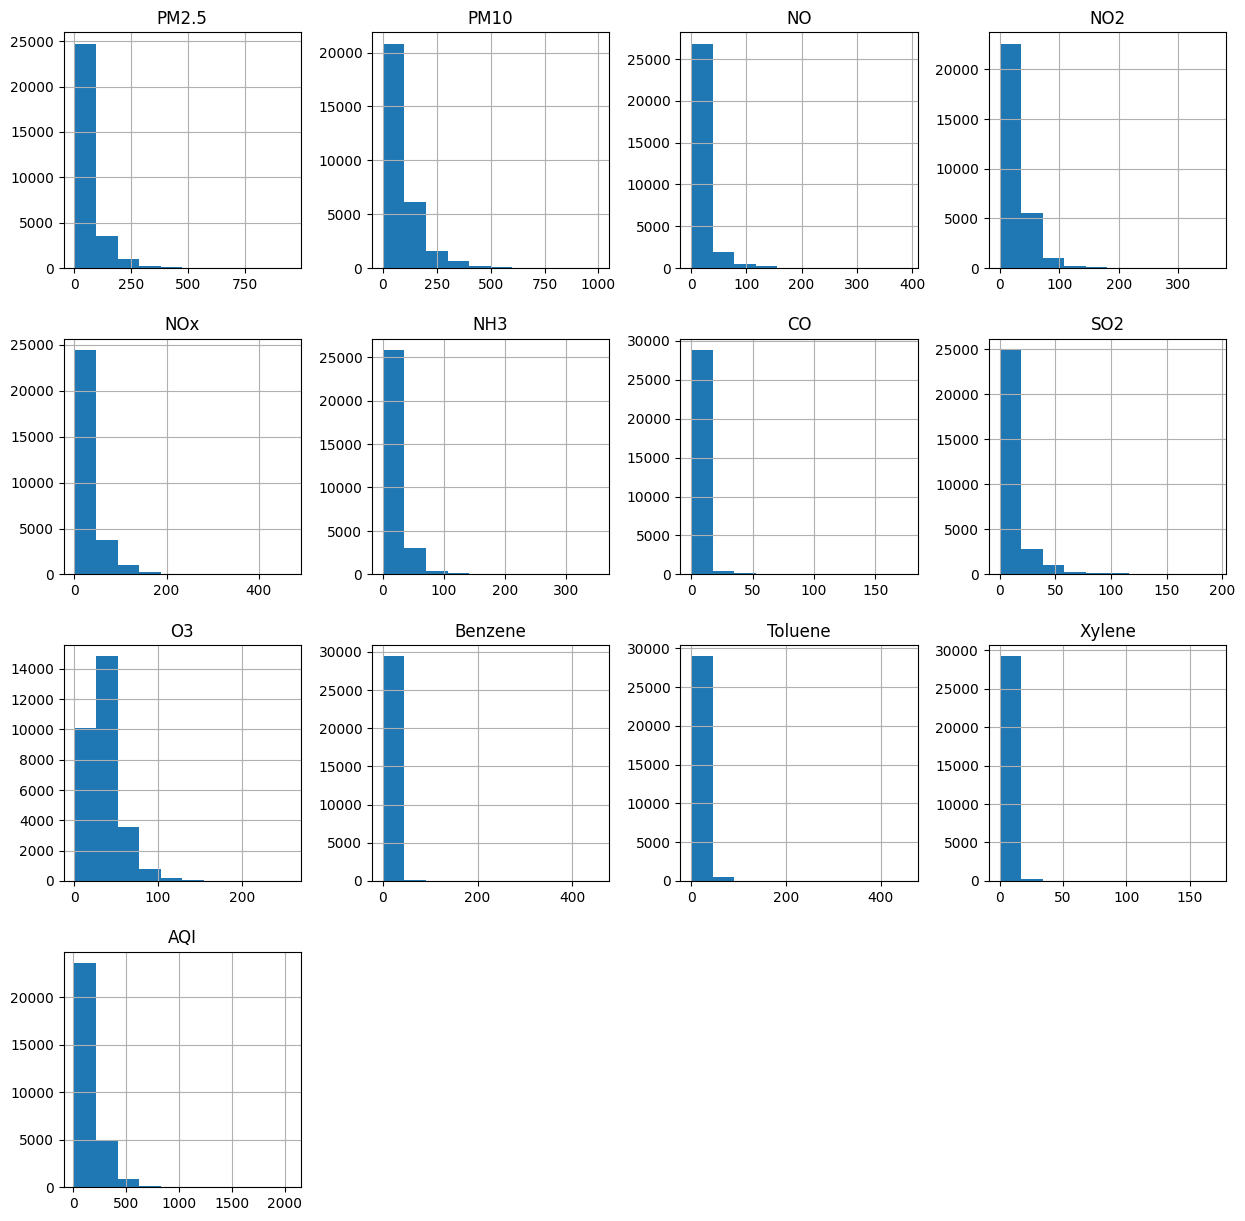

In [ ]:
df.hist(figsize=(15,15))
plt.show()

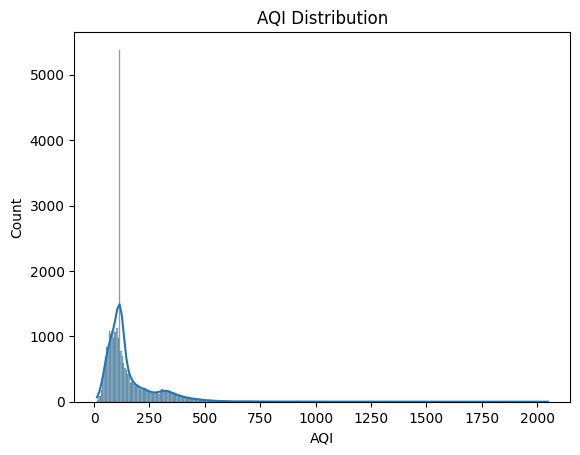

In [ ]:
sns.histplot(df['AQI'], kde=True)
plt.title('AQI Distribution')
plt.show()

In [ ]:
df

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
0,Ahmedabad,48.57,95.68,0.92,18.22,17.15,15.85,0.92,27.64,133.36,0.00,0.02,0.00,118.0
1,Ahmedabad,48.57,95.68,0.97,15.69,16.46,15.85,0.97,24.55,34.06,3.68,5.50,3.77,118.0
2,Ahmedabad,48.57,95.68,17.40,19.30,29.70,15.85,17.40,29.07,30.70,6.80,16.40,2.25,118.0
3,Ahmedabad,48.57,95.68,1.70,18.48,17.97,15.85,1.70,18.59,36.08,4.43,10.14,1.00,118.0
4,Ahmedabad,48.57,95.68,22.10,21.42,37.76,15.85,22.10,39.33,39.31,7.01,18.89,2.78,118.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0
29527,Visakhapatnam,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0
29528,Visakhapatnam,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0
29529,Visakhapatnam,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0


In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
df['City']=labelencoder.fit_transform(df['City'])

In [ ]:
df

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
0,0,48.57,95.68,0.92,18.22,17.15,15.85,0.92,27.64,133.36,0.00,0.02,0.00,118.0
1,0,48.57,95.68,0.97,15.69,16.46,15.85,0.97,24.55,34.06,3.68,5.50,3.77,118.0
2,0,48.57,95.68,17.40,19.30,29.70,15.85,17.40,29.07,30.70,6.80,16.40,2.25,118.0
3,0,48.57,95.68,1.70,18.48,17.97,15.85,1.70,18.59,36.08,4.43,10.14,1.00,118.0
4,0,48.57,95.68,22.10,21.42,37.76,15.85,22.10,39.33,39.31,7.01,18.89,2.78,118.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,25,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0
29527,25,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0
29528,25,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0
29529,25,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0


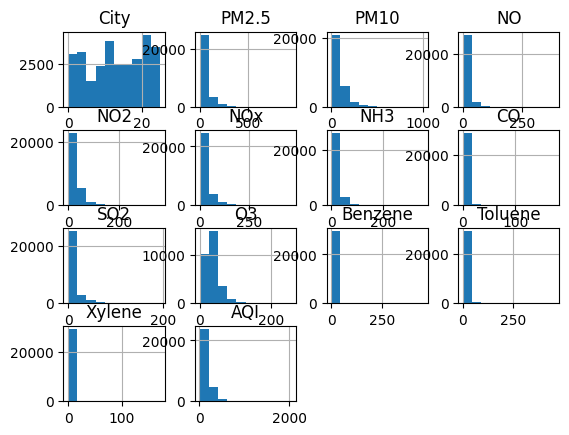

<Figure size 1000x1000 with 0 Axes>

In [ ]:
df.hist()
plt.figure(figsize=(10,10))
plt.show()

# **5. Feature Engineering**
Feature Selection:
Based on correlation analysis, the following features were chosen as independent variables:PM2.5, PM10, NO, NO2, NOx, CO, SO2.
Dependent Variable:AQI

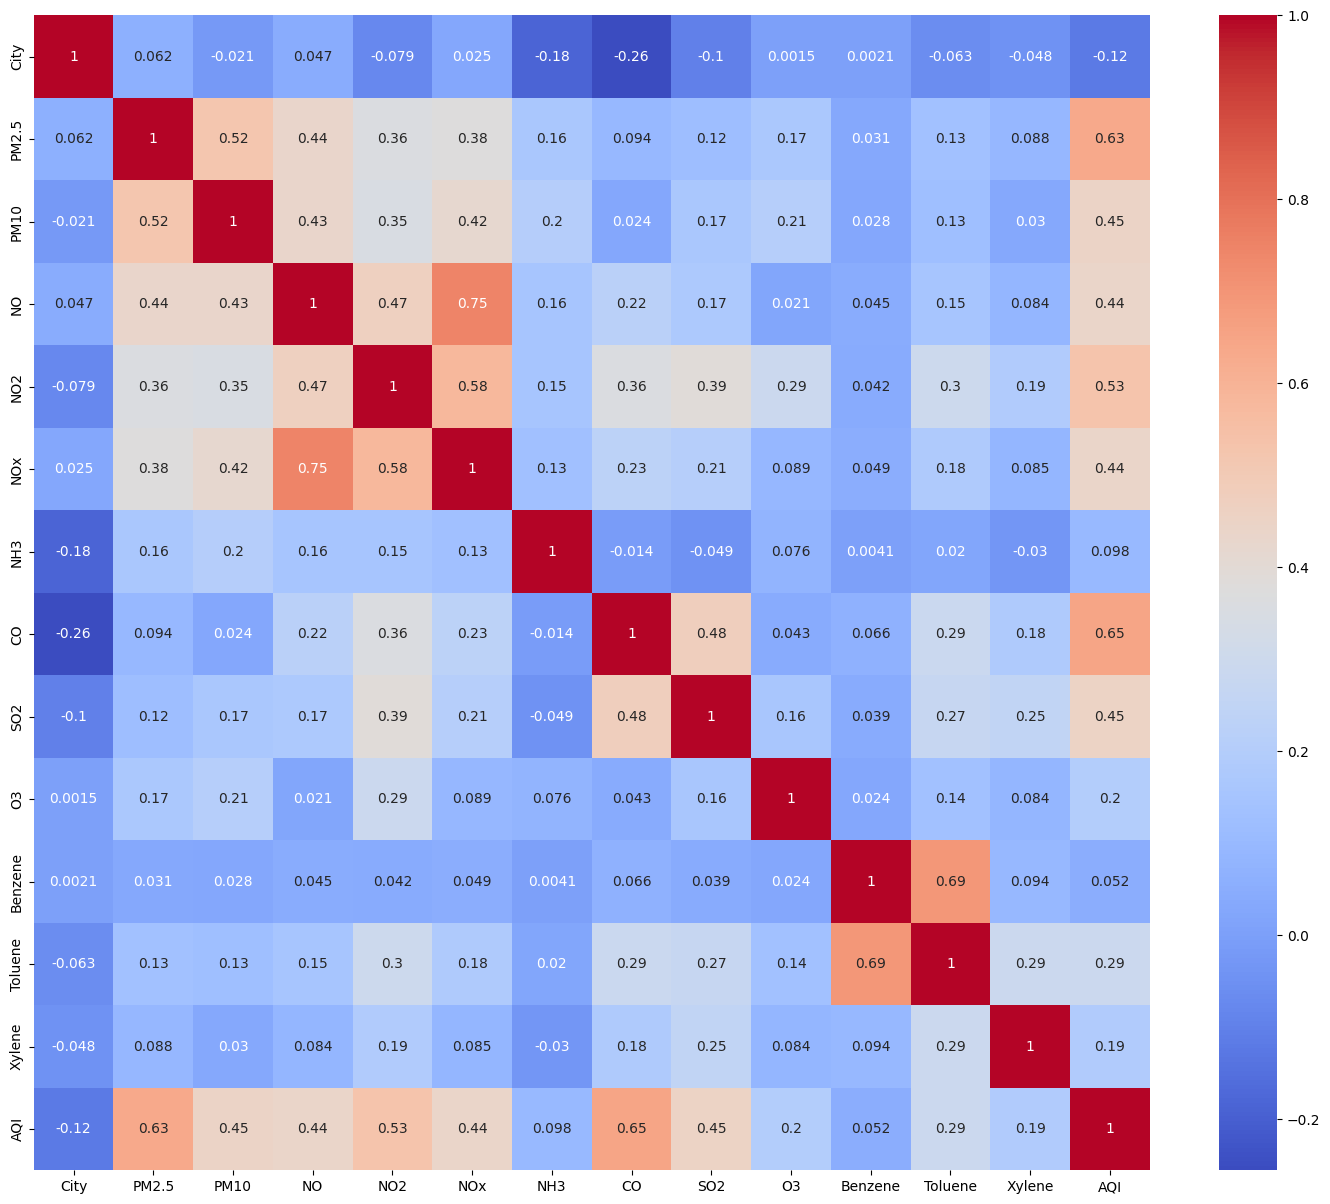

In [ ]:
corr_matrix=df.corr()
plt.figure(figsize=(18,15))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm')
plt.show()

In [ ]:
s=df.corr()["AQI"]
s.sort_values(ascending=False)

,AQI
AQI,1.000000
CO,0.650475
PM2.5,0.633654
NO2,0.531952
SO2,0.454182
PM10,0.447686
NO,0.438039
NOx,0.436282
Toluene,0.288749
O3,0.199100


In [ ]:
df.drop('Benzene',axis=1,inplace=True)
df.drop('NH3',axis=1,inplace=True)
df.drop('Xylene',axis=1,inplace=True)
df.drop('O3',axis=1,inplace=True)
df.drop('Toluene',axis=1,inplace=True)
df.drop('City',axis=1,inplace=True)

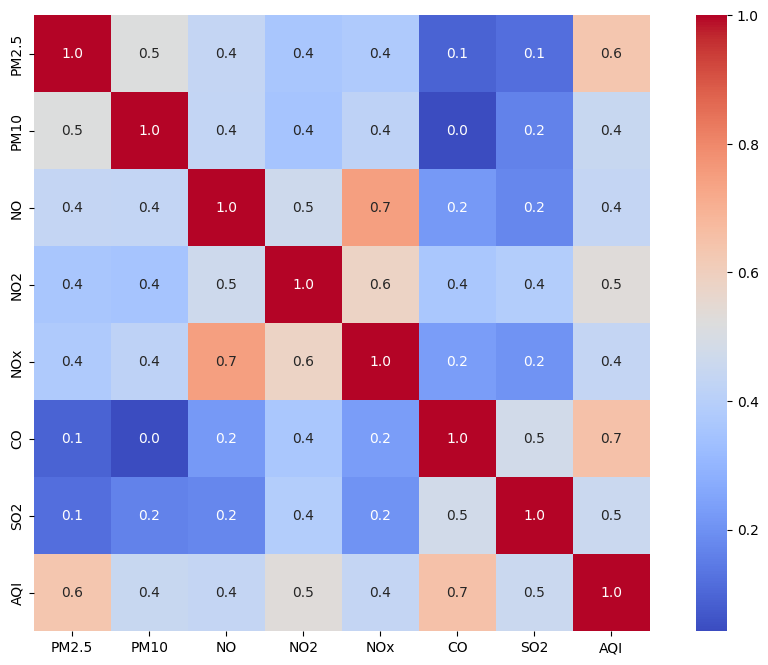

In [ ]:
corr_matrix = df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix,annot=True, fmt='0.01f', cmap='coolwarm',annot_kws=None, linewidths=0, robust=True,square=True)
plt.show()

In [ ]:
sf=s=df.corr()["AQI"]
sf=s.sort_values(ascending=False)
sf

,AQI
AQI,1.000000
CO,0.650475
PM2.5,0.633654
NO2,0.531952
SO2,0.454182
PM10,0.447686
NO,0.438039
NOx,0.436282


In [ ]:
df.shape

(29531, 8)

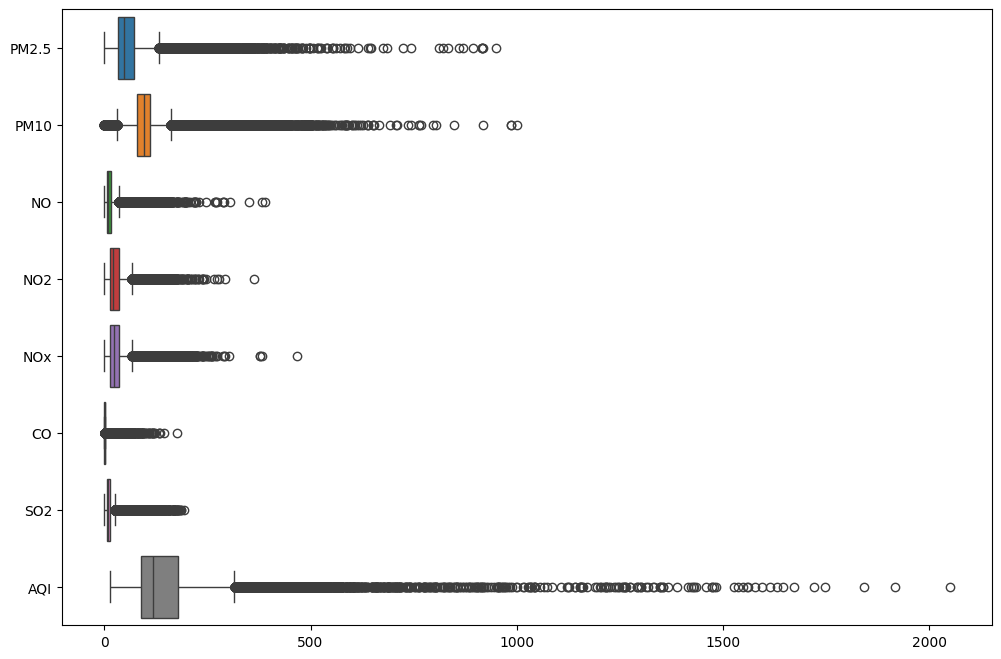

In [ ]:
plt.figure(figsize=(12,8))
sns.boxplot(df, orient='h')
plt.show()

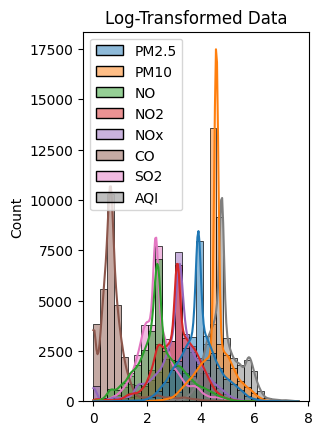

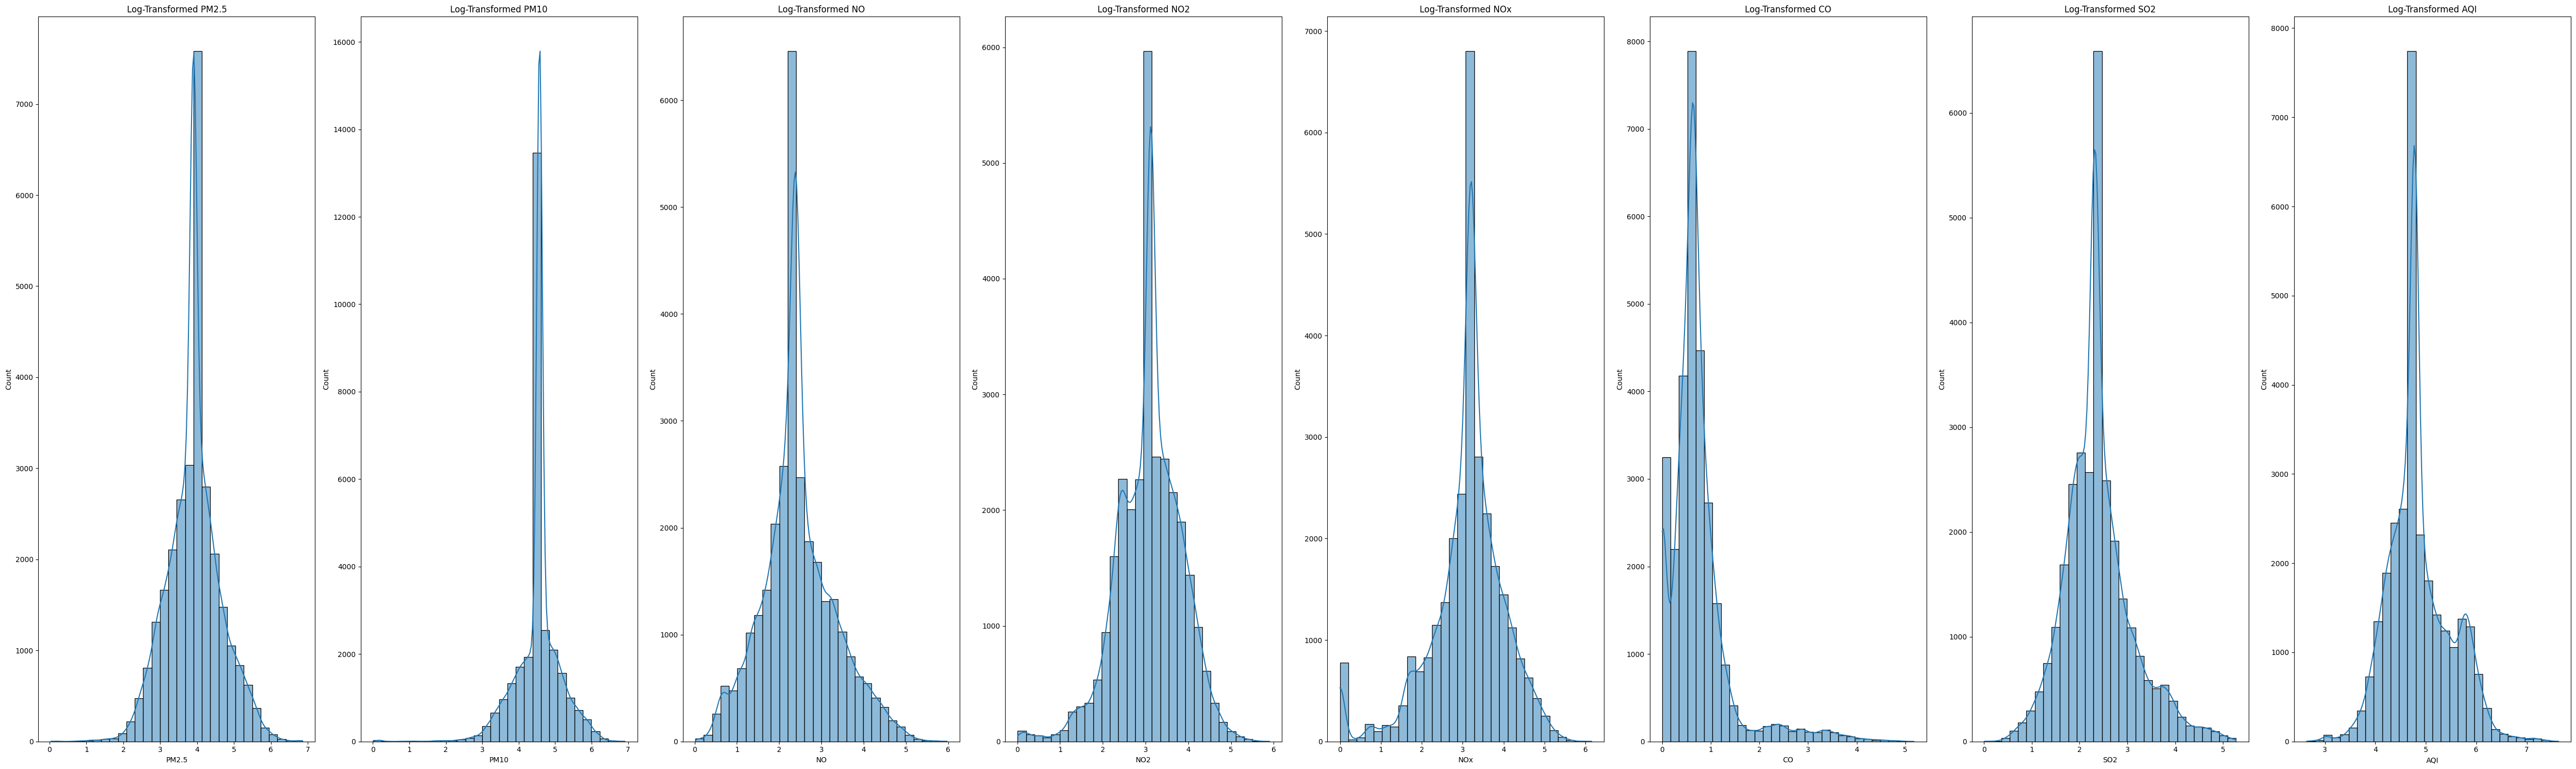

In [ ]:
# To handle skewness in the data
import numpy as np

# Applying log transformation to reduce skewness
# Adding 1 to avoid log(0) which would be undefined
log_data = np.log(df + 1)

# Plotting the distribution of log-transformed data for an overview
plt.subplot(1, 2, 2)
sns.histplot(log_data, bins=30, kde=True)  # Histogram with kernel density estimation
plt.title("Log-Transformed Data")
plt.show()

# Visualizing the distribution of each feature after transformation
num_features = log_data.shape[1]  # Counting the number of features
plt.figure(figsize=(50, 15))  # Setting figure size based on the number of features

# Looping through each feature to plot individually
for i, column in enumerate(log_data.columns, 1):
    plt.subplot(1, num_features, i)  # Creating subplots for each feature
    sns.histplot(log_data[column], bins=30, kde=True)  # Histogram for each column
    plt.title(f"Log-Transformed {column}")  # Adding a title for each subplot

# Adjusting layout to ensure no overlap between subplots
plt.tight_layout()
plt.show()


In [ ]:
log_data.shape

(29531, 8)

In [ ]:
df=log_data

# **6. Model Training and Testing**
Data Splitting:
Training Set: 80% of the data
Testing Set: 20% of the data
Random State: 42 to ensure reproducibility
Model Used:
RandomForestRegressor: Chosen for its ability to handle non-linear data and capture complex relationships between variables.
Training:
The model was trained using the fit() method on the training set.
Predictions:
Predicted AQI values for the test set were generated using the predict() method.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

In [ ]:
cor=df.corr()['AQI']#finding correlatiom
cor.sort_values(ascending=False)

,AQI
AQI,1.000000
PM2.5,0.791353
PM10,0.630454
CO,0.542678
NO,0.488596
NO2,0.466398
NOx,0.405340
SO2,0.401969


In [ ]:
independent_feature=['PM2.5','PM10','NO2',"NO",'NOx','CO','SO2'] #independent feature
dependent_feature=['AQI']#dependent feature
x=df[independent_feature]
y=df[dependent_feature]

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,#0.2 means 20% of data specified for testing set,and the other 80% for training set
                                               random_state=42)# to take the same data for training and testing set

print(x_train.shape)  # Prints the shape of x_train (rows, columns)
print(x_test.shape)   # Prints the shape of x_test
print(y_train.shape)  # Prints the shape of y_train
print(y_test.shape)   # Prints the shape of y_test

(23624, 7)
(5907, 7)
(23624, 1)
(5907, 1)


# **7. Model Evaluation**
Metrics:
Mean Squared Error (MSE): Indicator of average squared prediction error.
Mean Absolute Error (MAE): Indicator of average absolute prediction error.
R-squared (R²): Measure of how well the model explains the variance in the dependent variable.

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
model=RandomForestRegressor()
#why using RandomForestRegressor(can handle non-linear data and perform well even when relationships between variables are complex.)
model.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor()

In [ ]:
y_pred=model.predict(x_test)
y_pred

array([4.77844276, 4.77844276, 4.82507722, ..., 4.83955927, 4.30530601,
       4.96189585])

In [ ]:
mse=mean_squared_error(y_test,y_pred)#An indicator of average squared prediction error.
mae=mean_absolute_error(y_test,y_pred)#An indicator of average absolute prediction error
r2=r2_score(y_test,y_pred)#An indicator of the model’s fit quality.
print('mean squared error:',mse)
print('mean absolute error:',mae)
print('r2 score:',r2)

mean squared error: 0.04503742002904036
mean absolute error: 0.1330822375039193
r2 score: 0.8754628408764721


#  Results and Observations

In [ ]:
df.head(5)

,PM2.5,PM10,NO,NO2,NOx,CO,SO2,AQI
0,3.903386,4.571407,0.652325,2.955951,2.898671,0.652325,3.354804,4.779123
1,3.903386,4.571407,0.678034,2.814810,2.859913,0.678034,3.240637,4.779123
2,3.903386,4.571407,2.912351,3.010621,3.424263,2.912351,3.403528,4.779123
3,3.903386,4.571407,0.993252,2.969388,2.942859,0.993252,2.975019,4.779123
4,3.903386,4.571407,3.139833,3.109953,3.657389,3.139833,3.697096,4.779123


In [ ]:
# PM2=float(input('enter the PM2.5:'))
# PM10=float(input('enter the PM10:'))
# NO2=float(input('enter the NO2:'))
# SO2=float(input('enter the SO2:'))
# CO=float(input('enter the CO:'))
# NO=float(input('enter the NO:'))
# NOx=float(input('enter the NOx:'))
# user_input=np.array([[PM2,PM10,NO2,SO2,CO,NO,NOx]])
# predicted_AQI=model.predict(user_input)
# print('predicted AQI:',predicted_AQI)

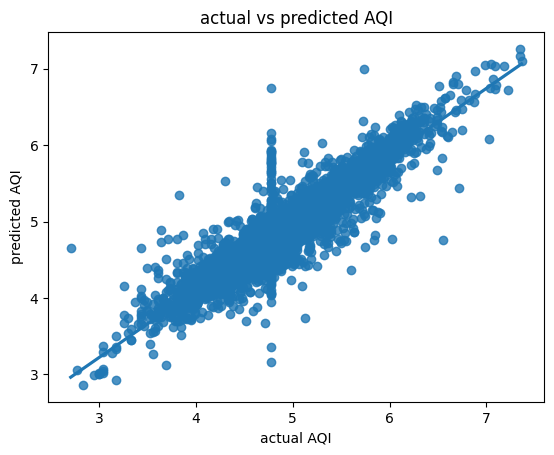

In [ ]:
sns.regplot(x=y_test,y=y_pred)
plt.xlabel('actual AQI')
plt.ylabel('predicted AQI')
plt.title('actual vs predicted AQI')
plt.show()